### 挑選特徵
目標：利用 heatmap 觀察並篩選 ML 欄位

In [1]:
import os
import numpy as np
import pandas as pd
from dataclasses import dataclass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%config inlineBackend.figure_format = 'retina'

### 參數設定

In [2]:
@dataclass
class Path:
    read: str = '../data_read/'
    
    write: str = '../data_write/'

class Data:
    dataset: str = 'US_1722_flights_dataset_v1_IQR.csv'

### 讀入 Dataset

讀入檔案

In [3]:
# 讀取檔案，篩選欄位
usecols = ['airline',
           'airport_depa',
           'airport_dest',
           'month_actu_depa',
           'day_actu_depa',
           'hr_actu_depa',
           'min_actu_depa',
           'month_actu_dest',
           'day_actu_dest',
           'hr_actu_dest',
           'min_actu_dest',
           'sche_duration',
           'actu_duration',
           'delay_dest',
           'delay_duration',
           'dry_bulb_temp_dest',
           'wet_bulb_temp_dest',
           'dew_point_temp_dest',
           'precipitation_dest',
           'snow_fall_dest',
           'snow_depth_dest',
           'relative_humidity_dest',
           'wind_speed_dest',
           'pressure_dest',
           'visibility_dest',
           'aircraft_model']

df = pd.read_csv(os.path.join(Path.read, Data.dataset), usecols=usecols)

C:\Users\chiaj\AppData\Local\Temp\ipykernel_32592\1396385203.py:29: DtypeWarning: Columns (75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(Path.read, Data.dataset), usecols=usecols)


刪除不必要的資訊

In [4]:
# 刪除所有有空值的資料
df = df.dropna()


# 刪除 取消飛行 的航班
df = df[df['actu_duration'] != 0]


# 刪除 7 個沒有降雨量的機場資料
n_airport = ['SCC', 'SWF', 'LCK', 'HHH', 'ROP', 'BPT', 'EFD']
df = df[(~df['airport_depa'].isin(n_airport)) & (~df['airport_dest'].isin(n_airport))]

df.shape

(28926859, 26)

In [5]:
# 另存新檔
df.to_csv('../data_write/US_1722_flights_dataset_v1_IQR_ML.csv', index=False, encoding='utf-8')

### 熱力圖

挑選欄位

In [5]:
log_cols = ['delay_dest',
            'delay_duration',
            'dry_bulb_temp_dest',
            'wet_bulb_temp_dest',
            'dew_point_temp_dest',
            'precipitation_dest',
            'snow_fall_dest',
            'snow_depth_dest',
            'relative_humidity_dest',
            'wind_speed_dest',
            'pressure_dest',
            'visibility_dest']

對資料進行【對數轉換】、【標準化】

In [6]:
# 欲進行標準化的欄位
scale_cols = [col + '_log' for col in log_cols]

# 對數轉換
for col in log_cols:
    df[col + '_log'] = np.log(df[col])

# 標準化
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[log_cols])

c:\Users\chiaj\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\chiaj\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\chiaj\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\chiaj\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\chiaj\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\chiaj\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log

繪製熱力圖

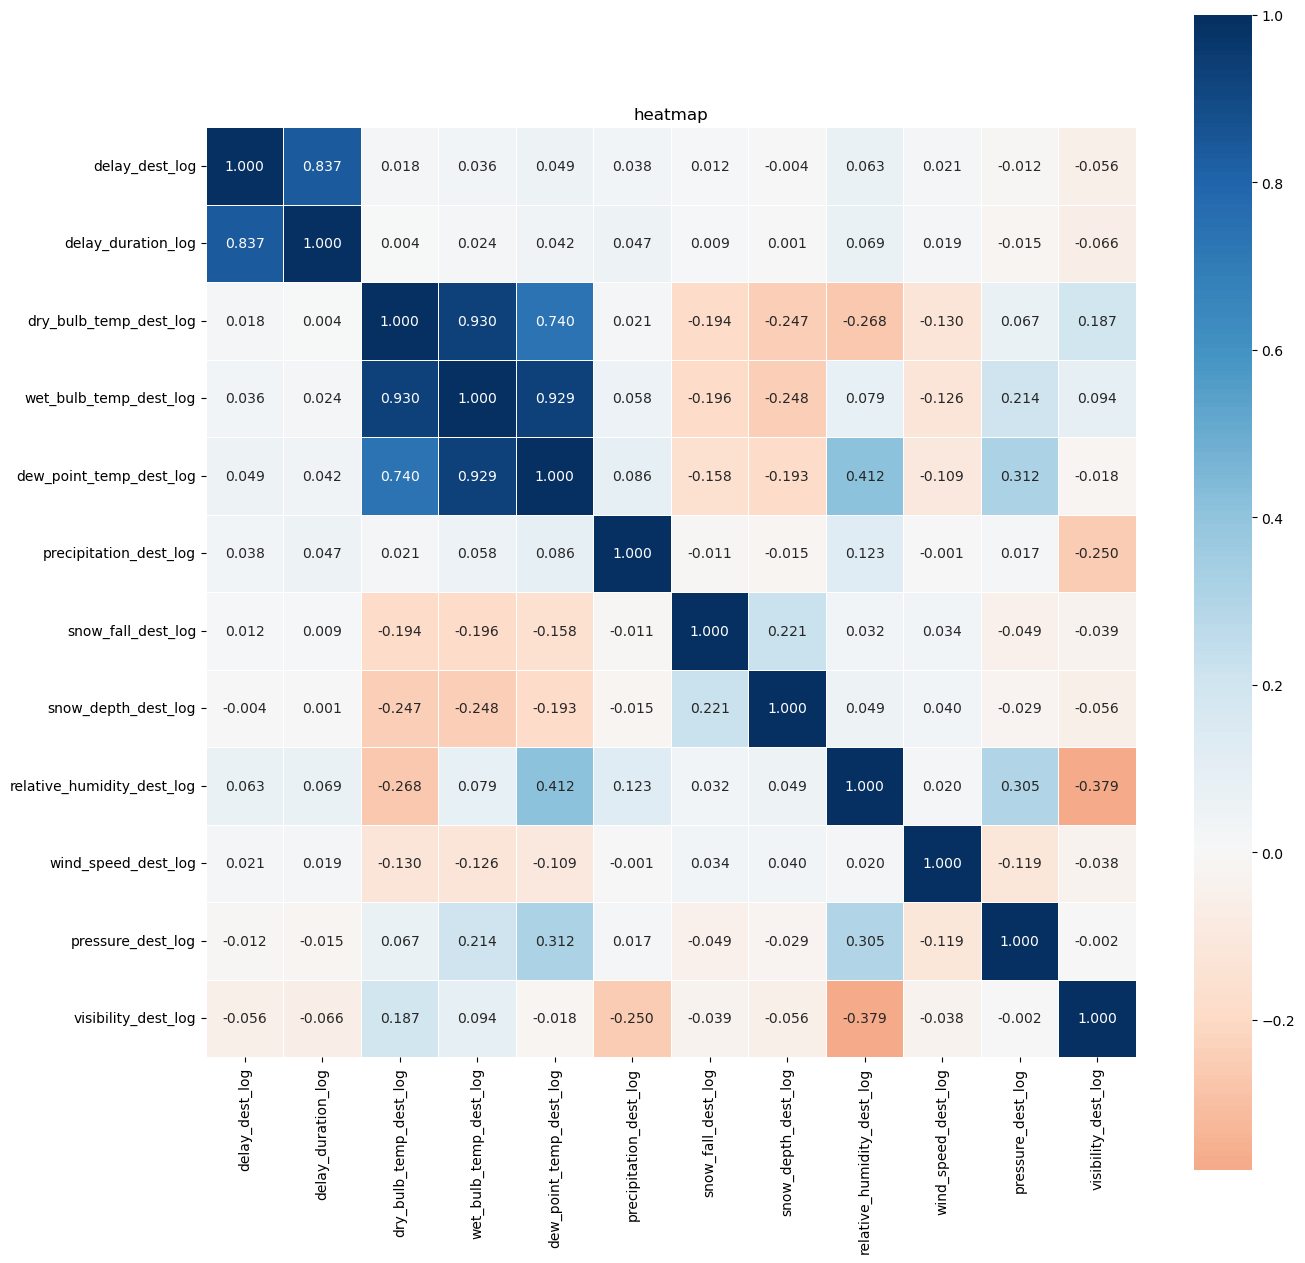

In [7]:
# 建立新繪圖區、設定畫布大小
plt.figure(figsize=(15, 15))

# 繪製熱力圖
sns.heatmap(df[scale_cols].corr(),
            annot=True,
            fmt=".3f",
            linewidth=.5,
            cmap="RdBu",
            center=0,
            square=True)

# 標題
plt.title('heatmap')

# 顯示圖表
plt.show()

結論：乾球溫度、濕球溫度、露點溫度，三者只取【乾球溫度】(一般口語上所說的溫度)

### 儲存已篩選欄位的 ML Dataset

In [8]:
df_ML = df.drop(['wet_bulb_temp_dest',
                 'dew_point_temp_dest',
                 'actu_duration'], axis=1)

In [10]:
# # 另存新檔
# df_ML.to_csv('../data_write/US_1722_flights_dataset_v1_IQR_ML.csv', index=False, encoding='utf-8')

### 欄位觀察

In [1]:
import pandas as pd

In [2]:
df_ML = pd.read_csv('../data_write/US_1722_flights_dataset_v1_IQR_ML.csv')

天氣欄位的統計分布(用於支持需要進行對數轉換與標準化)

In [5]:
# 指定要計算統計量的欄位
column_names = ['dry_bulb_temp_dest',
                'precipitation_dest',
                'snow_fall_dest',
                'snow_depth_dest',
                'relative_humidity_dest',
                'wind_speed_dest',
                'pressure_dest',
                'visibility_dest']

# 計算平均數
means = df_ML[column_names].mean()

# 計算標準差
stds = df_ML[column_names].std()

# 計算中位數
medians = df_ML[column_names].median()

# 計算最大值
max_values = df_ML[column_names].max()

# 計算最小值
min_values = df_ML[column_names].min()

# 創建新的 DataFrame 來存放統計結果
statistics_df_ML = pd.DataFrame({
    '欄位名稱': column_names,
    '平均數': means.values,
    '標準差': stds.values,
    '中位數': medians.values,
    '最大值': max_values.values,
    '最小值': min_values.values
})

# 輸出結果
statistics_df_ML

,欄位名稱,平均數,標準差,中位數,最大值,最小值
0,dry_bulb_temp_dest,63.964347,18.556630,66.000,140.00,0.000000
1,precipitation_dest,0.005325,0.029424,0.000,3.52,0.000000
2,snow_fall_dest,0.033463,0.341494,0.000,26.40,0.000000
3,snow_depth_dest,0.155639,1.225660,0.000,67.00,0.000000
4,relative_humidity_dest,59.161733,21.687427,61.000,100.00,0.000000
5,wind_speed_dest,22.555795,4.895679,22.000,132.00,0.000000
6,pressure_dest,29.111739,1.362745,29.485,31.25,21.953333
7,visibility_dest,9.477901,1.702532,10.000,99.42,0.000000


不同 delay 門檻下的【延誤資料量(y)】：delay_dest

In [15]:
# 設定 delay 門檻
gap = [5, 10, 15]

# 建立空的結果 DataFrame
result = pd.DataFrame(columns=['gap min', 'early', 'ontime', 'n_delay(E+O)', 'delay'])

# 逐一計算每個門檻條件的結果
for d in gap:
    # 計算【delay】的總計
    delay = df_ML[df_ML['delay_dest'] > d]['delay_dest'].count()
    # 計算【ontime】的總計
    ontime = df_ML[(df_ML['delay_dest'] <= d) & (df_ML['delay_dest'] > 0)]['delay_dest'].count()
    # 計算【early】的總計
    early = df_ML[df_ML['delay_dest'] < 0]['delay_dest'].count()
    # 計算【n_delay】的總計
    n_delay = df_ML[df_ML['delay_dest'] < d]['delay_dest'].count()
    # 將結果加入結果 DataFrame
    result = pd.concat([result, pd.DataFrame({'gap min':f'{d} min',
                                              'early':early,
                                              'ontime':ontime,
                                              'n_delay(E+O)':n_delay,
                                              'delay':delay}, index=[0])],ignore_index=True)

# 輸出結果
result

,gap min,early,ontime,n_delay(E+O),delay
0,5 min,22183944,2708146,24892090,4575403
1,10 min,22183944,4494946,26678890,2788603
2,15 min,22183944,5649891,27833835,1633658


不同 delay 門檻下的【延誤資料量(y)】：delay_duration

In [16]:
# 設定 delay 門檻
gap = [15, 30, 45, 60]

# 建立空的結果 DataFrame
result = pd.DataFrame(columns=['gap min', 'early','delay'])

# 逐一計算每個門檻條件的結果
for d in gap:
    # 計算【delay】的總計
    delay = df_ML[df_ML['delay_duration'] >= d]['delay_duration'].count()
    # 計算【early】的總計
    early = df_ML[df_ML['delay_duration'] < d]['delay_duration'].count()
    # 將結果加入結果 DataFrame
    result = pd.concat([result, pd.DataFrame({'gap min':f'{d} min',
                                              'early':early,
                                              'delay':delay}, index=[0])],ignore_index=True)

# 輸出結果
result

,gap min,early,delay
0,15 min,28181386,1286107
1,30 min,29278340,189153
2,45 min,29463771,3722
3,60 min,29467493,0
